In [2]:
#importing the Libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('Train.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615879,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608818,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797443,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261932,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108681,82271200


In [4]:
training_data =df.iloc[:,1:2].values
training_data.shape

(1488, 1)

In [5]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_data_scaled = sc.fit_transform(training_data)

In [6]:
training_data_scaled

array([[0.04084372],
       [0.04454118],
       [0.04455676],
       ...,
       [0.96056035],
       [0.95968669],
       [0.96667596]])

In [7]:
#Creating a data structure with 60 timesteps

X_train = []
Y_train = []

for i in range(60, len(training_data_scaled)):
    X_train.append(training_data_scaled[i-60:i, 0])
    Y_train.append(training_data_scaled[i, 0])

X_train, Y_train = np.array(X_train), np.array(Y_train)


In [8]:
X_train

array([[0.04084372, 0.04454118, 0.04455676, ..., 0.03758309, 0.04633529,
        0.03630379],
       [0.04454118, 0.04455676, 0.04596088, ..., 0.04633529, 0.03630379,
        0.03717745],
       [0.04455676, 0.04596088, 0.04738059, ..., 0.03630379, 0.03717745,
        0.03535212],
       ...,
       [0.94758021, 0.957877  , 0.95032603, ..., 0.96985865, 0.97035789,
        0.96648875],
       [0.957877  , 0.95032603, 0.95107485, ..., 0.97035789, 0.96648875,
        0.96056035],
       [0.95032603, 0.95107485, 0.86857617, ..., 0.96648875, 0.96056035,
        0.95968669]])

In [9]:
Y_train

array([0.03717745, 0.03535212, 0.03691223, ..., 0.96056035, 0.95968669,
       0.96667596])

In [10]:
X_train.shape

(1428, 60)

In [11]:
#Reshaping

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [12]:
X_train.shape

(1428, 60, 1)

In [15]:
#Building the model

model = tf.keras.Sequential()

#adding the 1st LSTM layer
model.add(tf.keras.layers.LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
#dropout Layer
model.add(tf.keras.layers.Dropout(0.2))

#adding the 2nd LSTM layer
model.add(tf.keras.layers.LSTM(units = 60, activation = 'relu', return_sequences = True))
#dropout Layer
model.add(tf.keras.layers.Dropout(0.2))

#adding the 3rd LSTM layer
model.add(tf.keras.layers.LSTM(units = 80, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
#dropout Layer
model.add(tf.keras.layers.Dropout(0.2))

#adding the 4th LSTM layer
model.add(tf.keras.layers.LSTM(units = 120, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
#dropout Layer
model.add(tf.keras.layers.Dropout(0.2))

#adding the dense layer
model.add(tf.keras.layers.Dense(units = 1))

In [16]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [17]:
#Training the model

model.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
45/45 [==============================] - 14s 153ms/step - loss: 0.1410
Epoch 2/100
45/45 [==============================] - 8s 187ms/step - loss: 0.1045
Epoch 3/100
45/45 [==============================] - 7s 153ms/step - loss: 0.1022
Epoch 4/100
45/45 [==============================] - 8s 184ms/step - loss: 0.1015
Epoch 5/100
45/45 [==============================] - 8s 184ms/step - loss: 0.1019
Epoch 6/100
45/45 [==============================] - 7s 154ms/step - loss: 0.0995
Epoch 7/100
45/45 [==============================] - 8s 187ms/step - loss: 0.0991
Epoch 8/100
45/45 [==============================] - 7s 153ms/step - loss: 0.0987
Epoch 9/100
45/45 [==============================] - 8s 187ms/step - loss: 0.0987
Epoch 10/100
45/45 [==============================] - 8s 187ms/step - loss: 0.0979
Epoch 11/100
45/45 [==============================] - 7s 154ms/step - loss: 0.0981
Epoch 12/100
45/45 [==============================] - 9s 190ms/step - loss: 0.0980
Epoch 13/100

In [27]:
test_data = pd.read_csv('Test.csv')
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-12-01,190.330002,191.559998,189.229996,191.240005,190.737579,45679300
1,2023-12-04,189.979996,190.050003,187.449997,189.429993,188.932327,43389500
2,2023-12-05,190.210007,194.399994,190.179993,193.419998,192.911850,66628400
3,2023-12-06,194.449997,194.759995,192.110001,192.320007,191.814758,41089700
4,2023-12-07,193.630005,195.000000,193.589996,194.270004,193.759628,47477700


In [28]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       20 non-null     object 
 1   Open       20 non-null     float64
 2   High       20 non-null     float64
 3   Low        20 non-null     float64
 4   Close      20 non-null     float64
 5   Adj Close  20 non-null     float64
 6   Volume     20 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ KB


In [29]:
Stock_price = test_data.iloc[:,1:2].values

In [36]:
Stock_price.shape

(20, 1)

In [37]:
#Concatinating the data

dataset_total = pd.concat((df['Open'], test_data['Open']), axis = 0)

#Getting the inputs and outputs

inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values

inputs = inputs.reshape(-1,1)

#feature scaling

inputs = sc.transform(inputs)

#creating a test set

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [39]:
#getting the prediction

predicted_stock_price = model.predict(X_test)
predicted_stock_price = predicted_stock_price.reshape(-1,1)
#inverse transform

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 87ms/step


In [45]:
print(Stock_price[12], predicted_stock_price[12])

[196.160004] [112.018005]


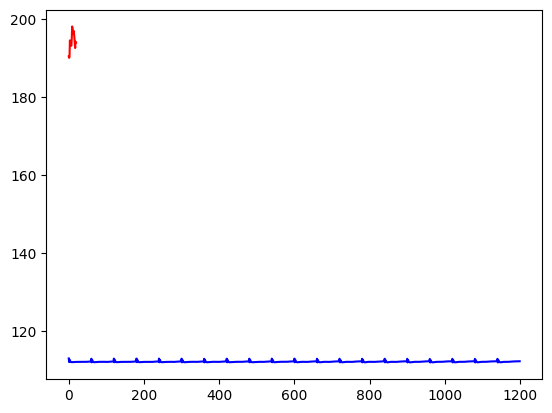

In [44]:
plt.plot(Stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')